In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
print(df.columns)
df.head()

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Initial Data Exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
len(df)

7043

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
id = df["customerID"]
df = df.drop("customerID", axis=1)

In [7]:
cat_df = df.select_dtypes(include="object")

In [8]:
cat_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [9]:
for col in cat_df.columns:
    print(f"Value count for: {col}\n")
    count = df[col].value_counts(ascending=False)
    proportions = df[col].value_counts(ascending=False, normalize=True)
    result_df = pd.concat([count, proportions], axis=1)
    result_df.columns = ['Count', 'Proportion']
    print(result_df)
    print("\n\n")

Value count for: gender

        Count  Proportion
gender                   
Male     3555    0.504756
Female   3488    0.495244



Value count for: Partner

         Count  Proportion
Partner                   
No        3641    0.516967
Yes       3402    0.483033



Value count for: Dependents

            Count  Proportion
Dependents                   
No           4933    0.700412
Yes          2110    0.299588



Value count for: PhoneService

              Count  Proportion
PhoneService                   
Yes            6361    0.903166
No              682    0.096834



Value count for: MultipleLines

                  Count  Proportion
MultipleLines                      
No                 3390    0.481329
Yes                2971    0.421837
No phone service    682    0.096834



Value count for: InternetService

                 Count  Proportion
InternetService                   
Fiber optic       3096    0.439585
DSL               2421    0.343746
No                1526    0.

In [10]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
import regex
df = df.replace(r'^\s*$', np.nan, regex=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
mask = df['TotalCharges'].notna()
expected = df.loc[mask, 'tenure'] * df.loc[mask, 'MonthlyCharges']
actual = df.loc[mask, 'TotalCharges']

matches = abs((actual.round(2) - expected.round(2))) < 50

print(f"Matches: {matches.sum()}")
print(f"Don't match: {(~matches).sum()}")

# Show mismatches
mismatches = df.loc[mask][~matches]
print(mismatches[['tenure', 'MonthlyCharges', 'TotalCharges']])

Matches: 4709
Don't match: 2323
      tenure  MonthlyCharges  TotalCharges
3         45           42.30       1840.75
8         28          104.80       3046.05
10        13           49.95        587.45
12        58          100.35       5681.10
15        69          113.25       7895.15
...      ...             ...           ...
7012      62           84.95       5150.55
7024      44           84.80       3626.35
7037      72           21.15       1419.40
7039      72          103.20       7362.90
7042      66          105.65       6844.50

[2323 rows x 3 columns]


In [14]:
print(df[df['TotalCharges'].isna()].describe())

       SeniorCitizen  tenure  MonthlyCharges  TotalCharges
count           11.0    11.0       11.000000           0.0
mean             0.0     0.0       41.418182           NaN
std              0.0     0.0       23.831484           NaN
min              0.0     0.0       19.700000           NaN
25%              0.0     0.0       20.125000           NaN
50%              0.0     0.0       25.750000           NaN
75%              0.0     0.0       58.975000           NaN
max              0.0     0.0       80.850000           NaN


In [15]:
print(df[df['TotalCharges'].isna()]['tenure'].value_counts())
print(df[df['TotalCharges'].isna()]['Churn'].value_counts())

tenure
0    11
Name: count, dtype: int64
Churn
No    11
Name: count, dtype: int64


In [16]:
#any customer with null totalcharges is most likely a brand new customer and will most likely lack any predictive power. Therefore, it is best to drop them ---------
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [18]:
len(df[(df["PhoneService"].str.lower() == "no") & (df["MultipleLines"].str.lower() != "no phone service")])

0

In [19]:
#Checking data consistency -----------------
print(len(df[(df["InternetService"].str.lower() == "no") & (df["OnlineSecurity"].str.lower() != "no internet service")]))
print(len(df[(df["InternetService"].str.lower() == "no") & (df["DeviceProtection"].str.lower() != "no internet service")]))
print(len(df[(df["InternetService"].str.lower() == "no") & (df["TechSupport"].str.lower() != "no internet service")]))
print(len(df[(df["InternetService"].str.lower() == "no") & (df["StreamingTV"].str.lower() != "no internet service")]))
print(len(df[(df["InternetService"].str.lower() == "no") & (df["StreamingMovies"].str.lower() != "no internet service")]))
print(len(df[(df["InternetService"].str.lower() == "no") & (df["OnlineBackup"].str.lower() != "no internet service")]))

0
0
0
0
0
0


In [20]:
mailed_check = df[df['PaymentMethod'] == 'Mailed check']
print(mailed_check['tenure'].describe())
print(mailed_check['Churn'].value_counts())

count    1604.000000
mean       21.938903
std        21.214997
min         1.000000
25%         3.000000
50%        15.000000
75%        36.000000
max        72.000000
Name: tenure, dtype: float64
Churn
No     1296
Yes     308
Name: count, dtype: int64


In [21]:
df["SeniorCitizen"].value_counts(normalize=True)

SeniorCitizen
0    0.8376
1    0.1624
Name: proportion, dtype: float64

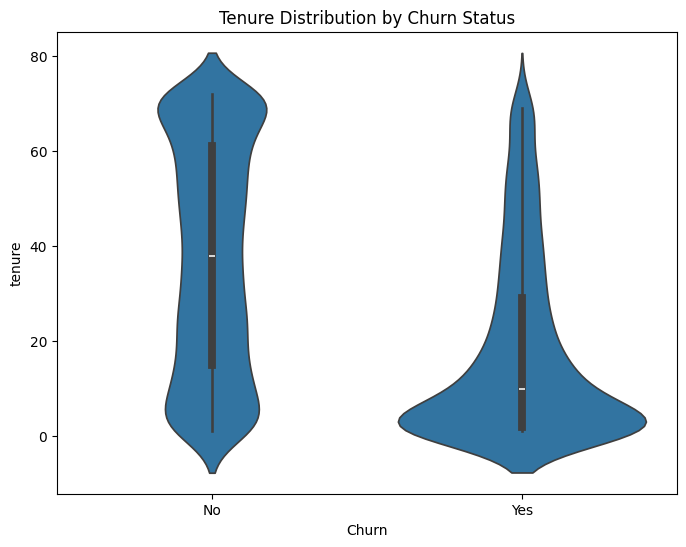

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Churn', y='tenure')
plt.title('Tenure Distribution by Churn Status')
plt.show()

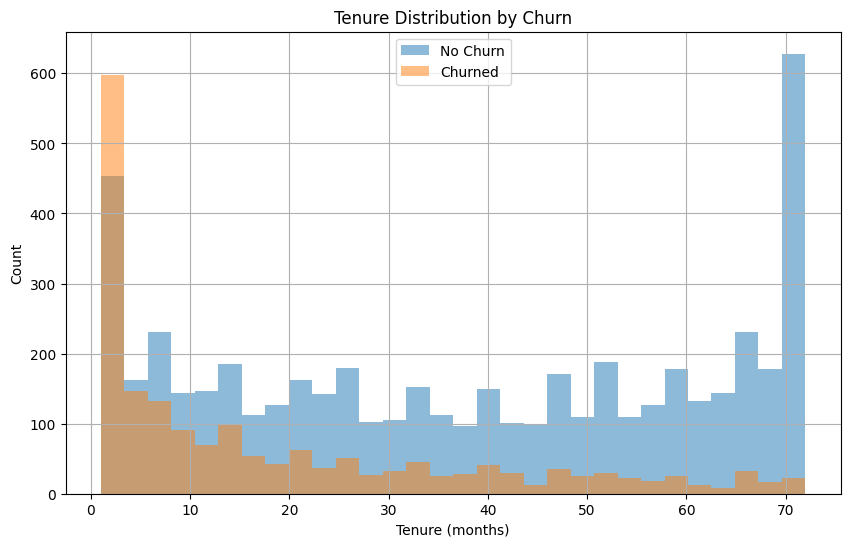

In [23]:
plt.figure(figsize=(10, 6))
df[df['Churn'] == 'No']['tenure'].hist(bins=30, alpha=0.5, label='No Churn')
df[df['Churn'] == 'Yes']['tenure'].hist(bins=30, alpha=0.5, label='Churned')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend()
plt.title('Tenure Distribution by Churn')
plt.show()

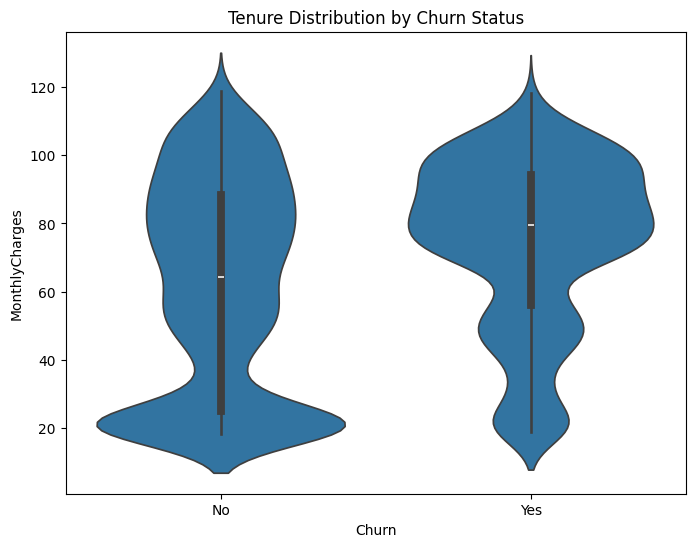

In [24]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Tenure Distribution by Churn Status')
plt.show()

In [25]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 48, 72], 
                             labels=['0-6', '7-12', '13-24', '25-48', '49-72'])

churn_rate = df.groupby('tenure_group', observed=True)['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
)
print(churn_rate)

tenure_group
0-6      53.333333
7-12     35.886525
13-24    28.710938
25-48    20.388959
49-72     9.513176
Name: Churn, dtype: float64


In [26]:
# Churn rate by payment method
churn_rate = df.groupby('PaymentMethod')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
)
print(churn_rate)

PaymentMethod
Bank transfer (automatic)    16.731518
Credit card (automatic)      15.253123
Electronic check             45.285412
Mailed check                 19.201995
Name: Churn, dtype: float64


In [27]:

pd.crosstab(df['PaymentMethod'], df['SeniorCitizen'], normalize=True) * 100

SeniorCitizen,0,1
PaymentMethod,,
Bank transfer (automatic),18.614903,3.313424
Credit card (automatic),18.486917,3.142776
Electronic check,25.184869,8.447099
Mailed check,21.473265,1.336746


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

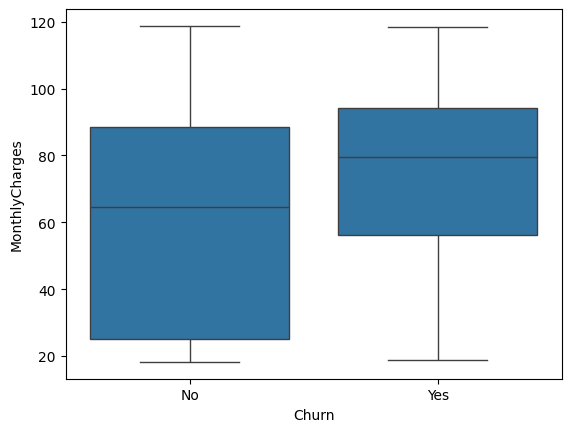

In [28]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")

In [29]:
df["avg_historical_charge"] = df["TotalCharges"] / df["tenure"]

In [30]:
df["price_change"] = df["MonthlyCharges"] - df["avg_historical_charge"]

In [31]:
df['price_change_category'] = df['price_change'].apply(lambda x: 'Decreased' if x < 0 else 'Increased/Same')

In [32]:
pd.crosstab(df['Churn'], df['price_change_category'])

price_change_category,Decreased,Increased/Same
Churn,,
No,2466,2697
Yes,738,1131


## Baseline Model

In [33]:
import regex
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [36]:
mapped_df = df.drop("customerID", axis=1)
mapped_df["gender"]

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7032, dtype: object

In [37]:
one_hot_encoded= pd.get_dummies(mapped_df)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


# Prepare data
X = pd.get_dummies(df.drop(['Churn'], axis=1), drop_first=True)
y = LabelEncoder().fit_transform(df['Churn'])  # Convert Yes/No to 1/0

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Random Forest doesn't need scaling and doesn't have convergence issues
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.790
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407



                                    feature  importance
3                              TotalCharges    0.102437
1                                    tenure    0.095978
2                            MonthlyCharges    0.083280
7041            InternetService_Fiber optic    0.026298
7050                        TechSupport_Yes    0.021811
7056                      Contract_Two year    0.021601
7059         PaymentMethod_Electronic check    0.021445
7044                     OnlineSecurity_Yes    0.021355
7055                      Contract_One year    0.017938
7057                   PaperlessBilling_Yes    0.017083
7035                            gender_Male    0.015841
7036                            Partner_Yes    0.015289
7046                       OnlineBackup_Yes    0.014478
0                             SeniorCitizen    0.014060
7037                         Dependents_Yes    0.013318
7040                      MultipleLines_Yes    0.012463
7048                   DeviceProtection_Yes    0

<Figure size 1000x800 with 0 Axes>

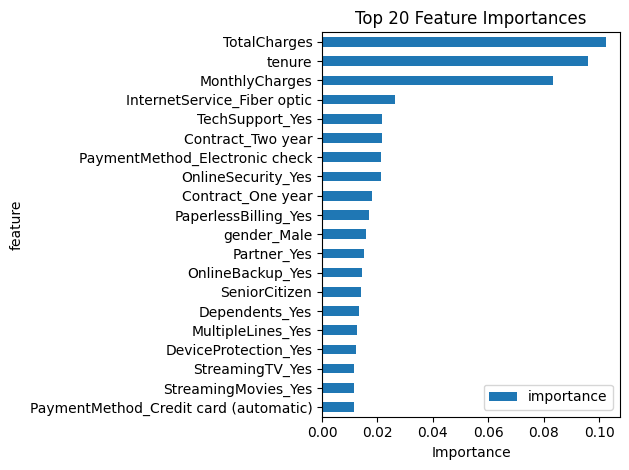

In [39]:

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(20))

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
feature_importance.head(20).plot(x='feature', y='importance', kind='barh')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Example: If tenure and MonthlyCharges are top features

# Prepare data
X = df[["TotalCharges", "tenure", "MonthlyCharges"]]
y = LabelEncoder().fit_transform(df['Churn'])  # Convert Yes/No to 1/0

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Random Forest doesn't need scaling and doesn't have convergence issues
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.756
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.42      0.48       374

    accuracy                           0.76      1407
   macro avg       0.68      0.65      0.66      1407
weighted avg       0.74      0.76      0.74      1407



## More Exploration


TotalCharges:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
No     8672.45  
Yes    8684.80  


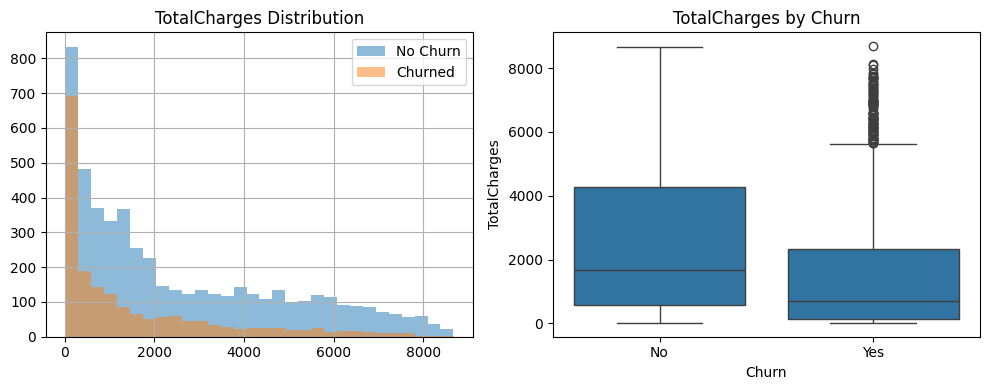


tenure:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


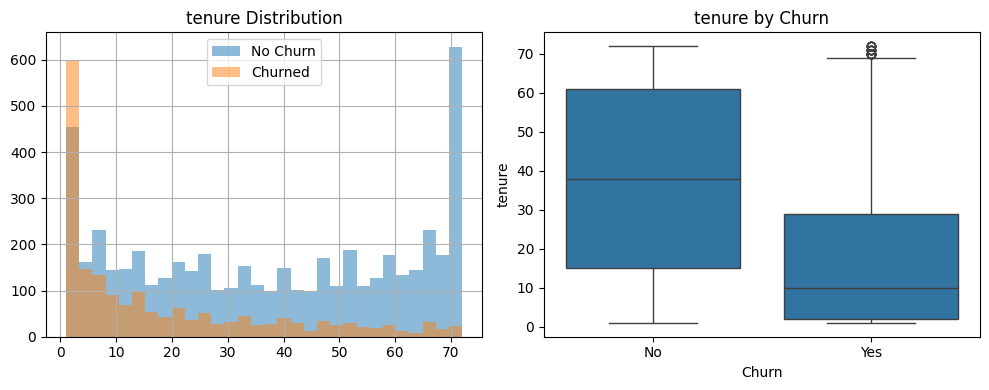


MonthlyCharges:
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
No     5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


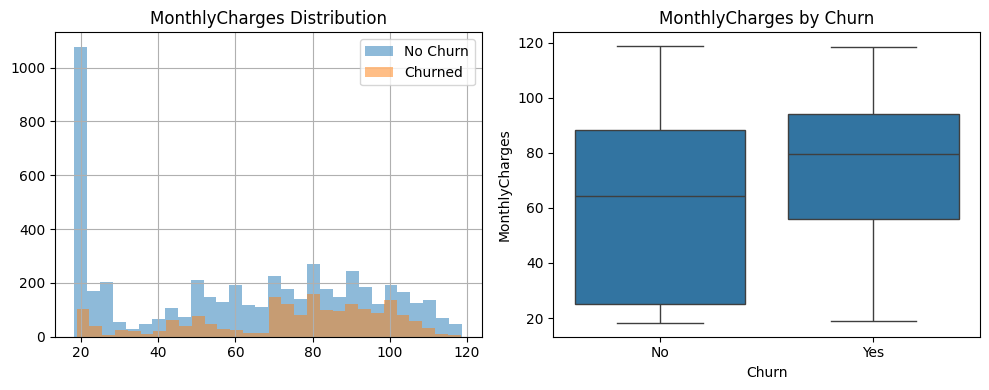

In [42]:
# For each top feature, see HOW it relates to churn
for feature in feature_importance['feature'].head(3):
    print(f"\n{feature}:")
    print(df.groupby('Churn')[feature].describe())
    
    # Visualize
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    df[df['Churn'] == 'No'][feature].hist(bins=30, alpha=0.5, label='No Churn')
    df[df['Churn'] == 'Yes'][feature].hist(bins=30, alpha=0.5, label='Churned')
    plt.legend()
    plt.title(f'{feature} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'{feature} by Churn')
    
    plt.tight_layout()
    plt.show()

In [43]:
df["MonthlyCharges"].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [44]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [45]:
df["InternetService"].describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

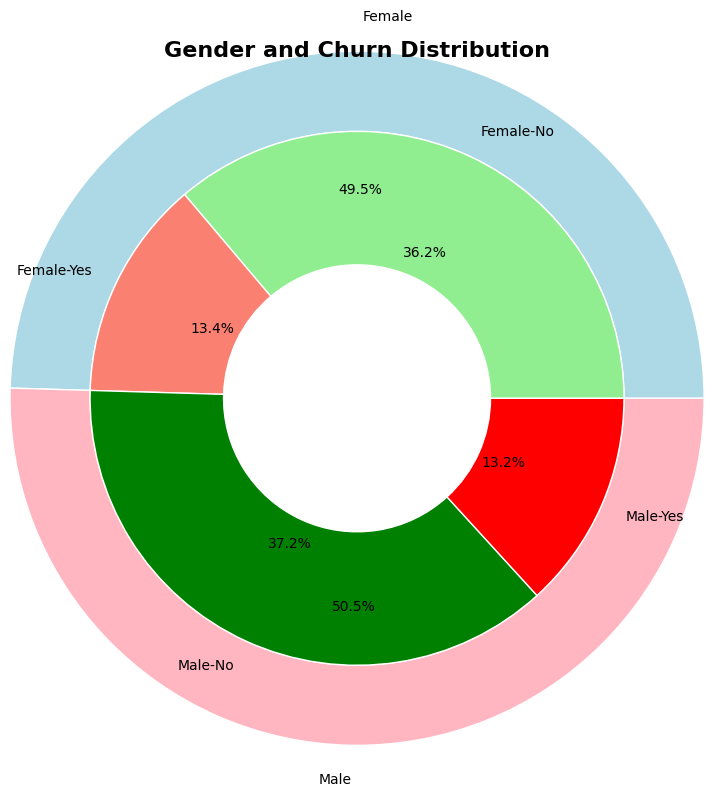

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Get data
gender_churn = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

# Outer ring: Gender
gender_totals = gender_churn.sum(axis=1)
outer_colors = ['lightblue', 'lightpink']

# Inner ring: Churn within each gender
inner_data = []
inner_labels = []
inner_colors = []

for gender in gender_churn.index:
    for churn in gender_churn.columns:
        inner_data.append(gender_churn.loc[gender, churn])
        inner_labels.append(f'{gender}-{churn}')
        if churn == 'No':
            inner_colors.append('green' if gender == 'Male' else 'lightgreen')
        else:
            inner_colors.append('red' if gender == 'Male' else 'salmon')

fig, ax = plt.subplots(figsize=(10, 8))

# Outer ring
ax.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', 
       radius=1.3, colors=outer_colors, wedgeprops=dict(width=0.3, edgecolor='white'))

# Inner ring
ax.pie(inner_data, labels=inner_labels, autopct='%1.1f%%', 
       radius=1, colors=inner_colors, wedgeprops=dict(width=0.5, edgecolor='white'))

ax.set_title('Gender and Churn Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

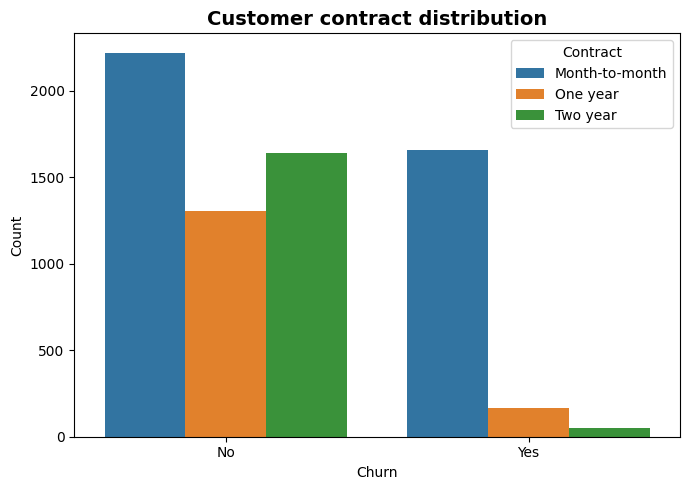

In [47]:

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='Contract')
plt.title('Customer contract distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Contract')
plt.tight_layout()
plt.show()

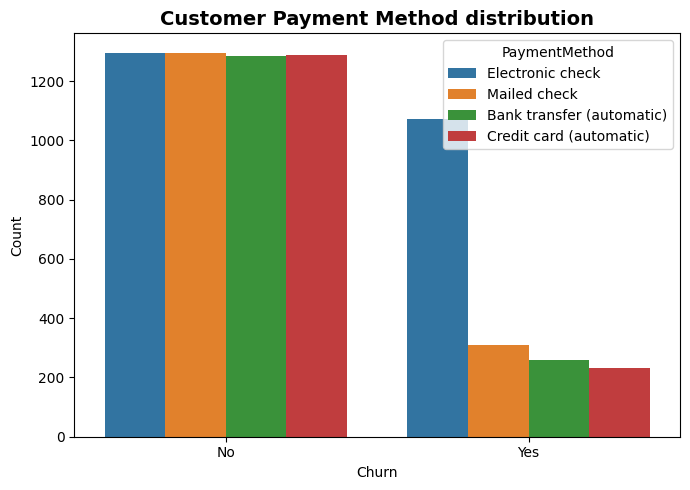

In [48]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='PaymentMethod')
plt.title('Customer Payment Method distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='PaymentMethod')
plt.tight_layout()
plt.show()

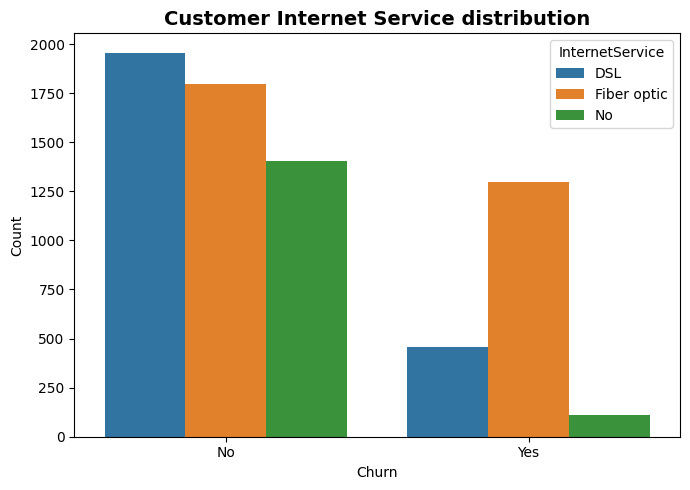

In [49]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='InternetService')
plt.title('Customer Internet Service distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='InternetService')
plt.tight_layout()
plt.show()

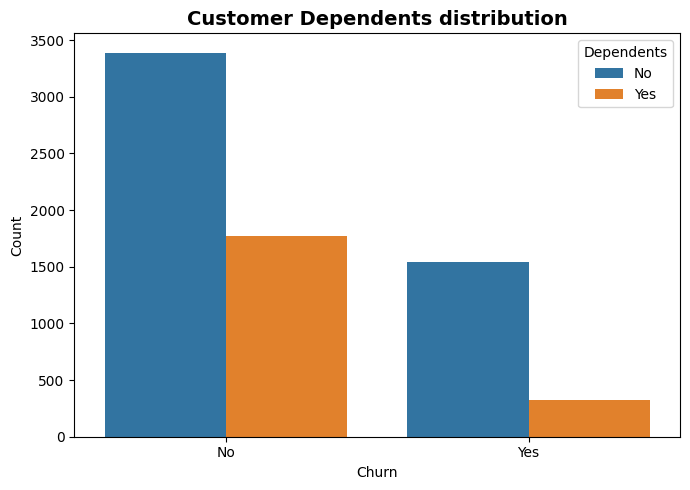

In [50]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='Dependents')
plt.title('Customer Dependents distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Dependents')
plt.tight_layout()
plt.show()

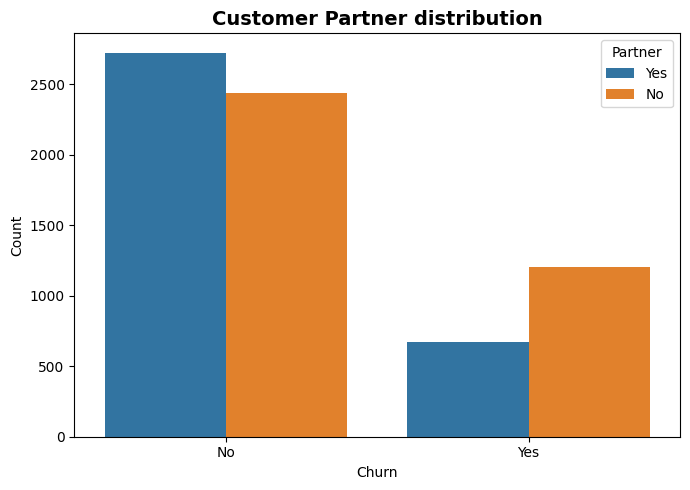

In [51]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='Partner')
plt.title('Customer Partner distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Partner')
plt.tight_layout()
plt.show()

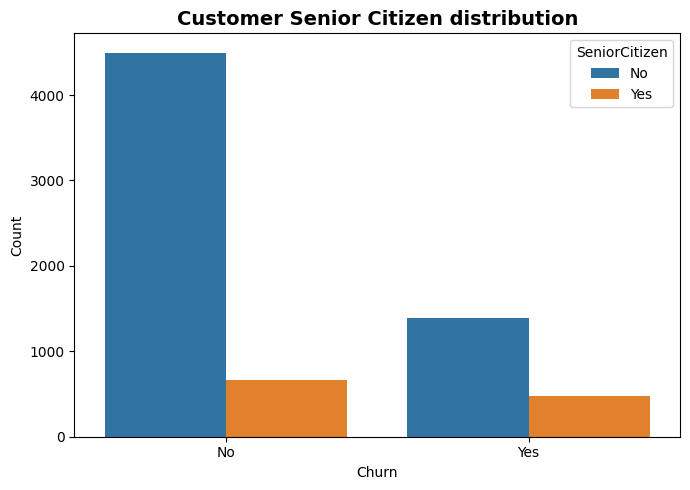

In [65]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='SeniorCitizen')
plt.title('Customer Senior Citizen distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='SeniorCitizen')
plt.tight_layout()
plt.show()

In [59]:
seniors = df[df["SeniorCitizen"] == "Yes"]

In [60]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64

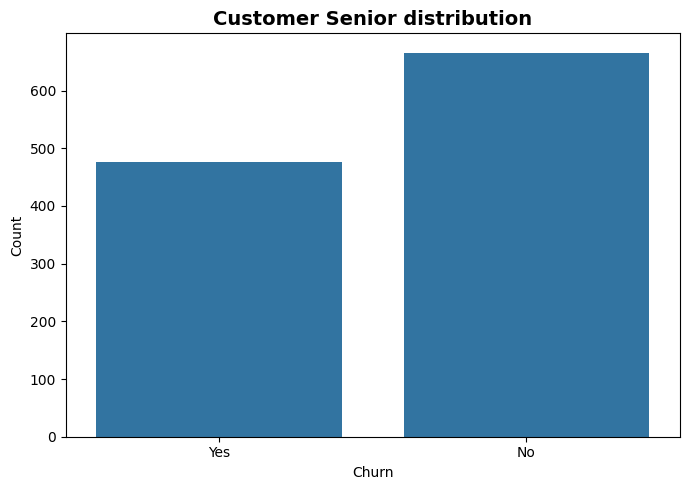

In [68]:
plt.figure(figsize=(7, 5))
sns.countplot(data=seniors, x='Churn')
plt.title('Customer Senior distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [69]:
non_seniors = df[df["SeniorCitizen"] == "No"]

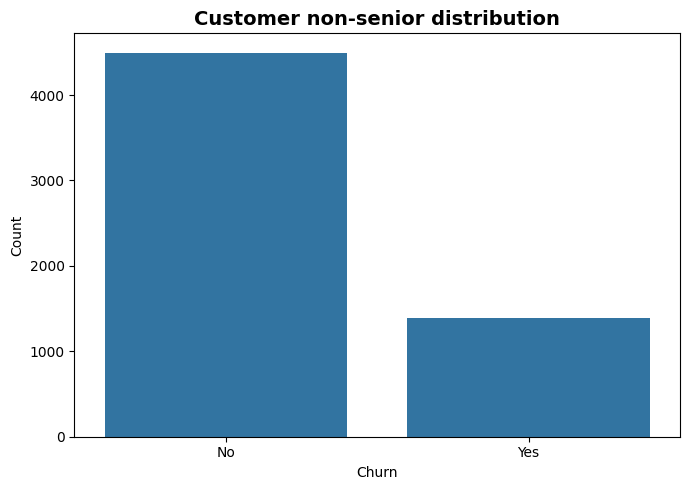

In [72]:
plt.figure(figsize=(7, 5))
sns.countplot(data=non_seniors, x='Churn')
plt.title('Customer non-senior distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

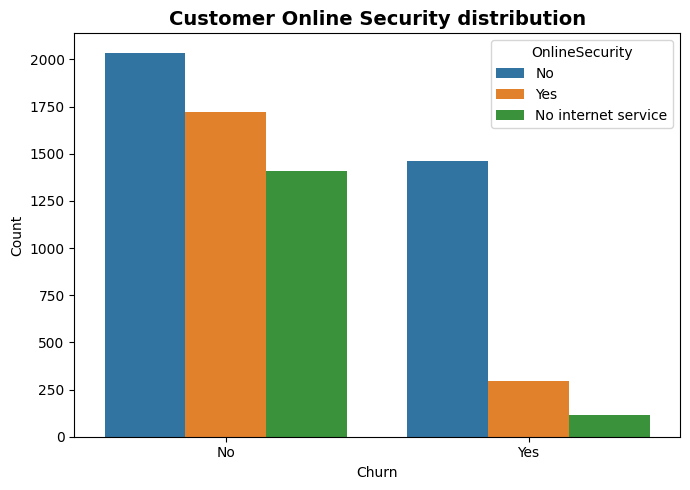

In [74]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='OnlineSecurity')
plt.title('Customer Online Security distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='OnlineSecurity')
plt.tight_layout()
plt.show()

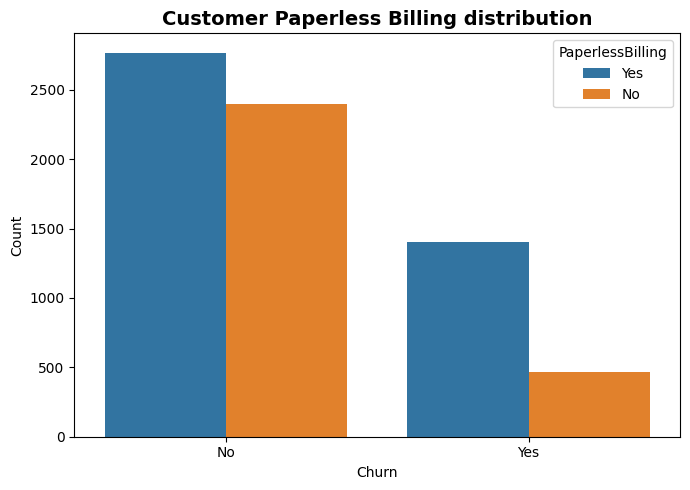

In [75]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='PaperlessBilling')
plt.title('Customer Paperless Billing distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='PaperlessBilling')
plt.tight_layout()
plt.show()

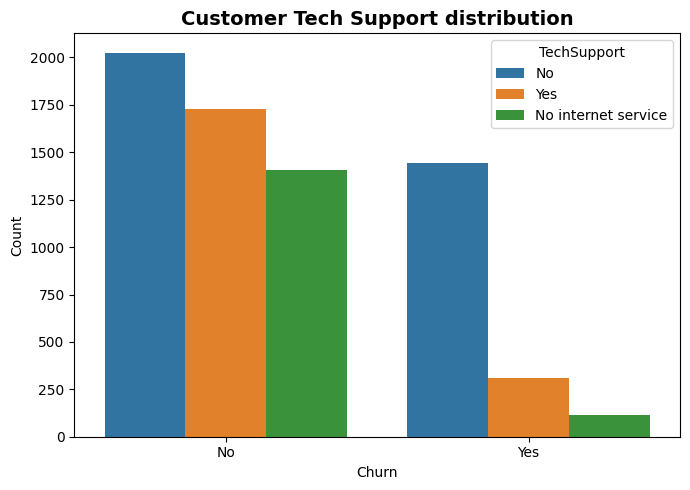

In [76]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='TechSupport')
plt.title('Customer Tech Support distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='TechSupport')
plt.tight_layout()
plt.show()

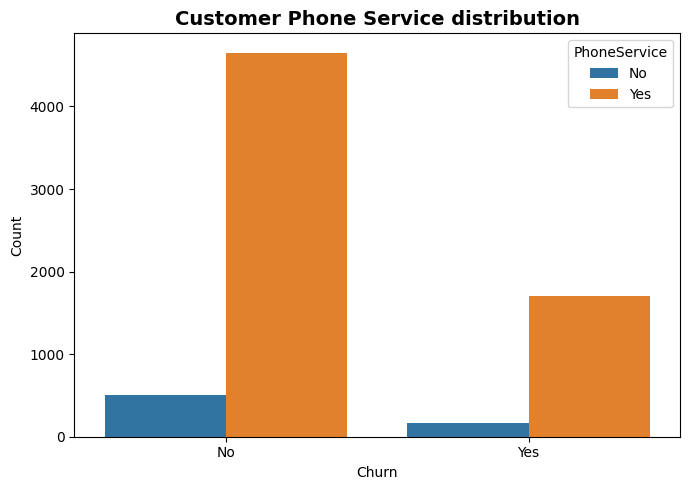

In [77]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', hue='PhoneService')
plt.title('Customer Phone Service distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='PhoneService')
plt.tight_layout()
plt.show()

In [78]:
df[df["PhoneService"] == "No"]["Churn"].value_counts(normalize=True)

Churn
No     0.75
Yes    0.25
Name: proportion, dtype: float64

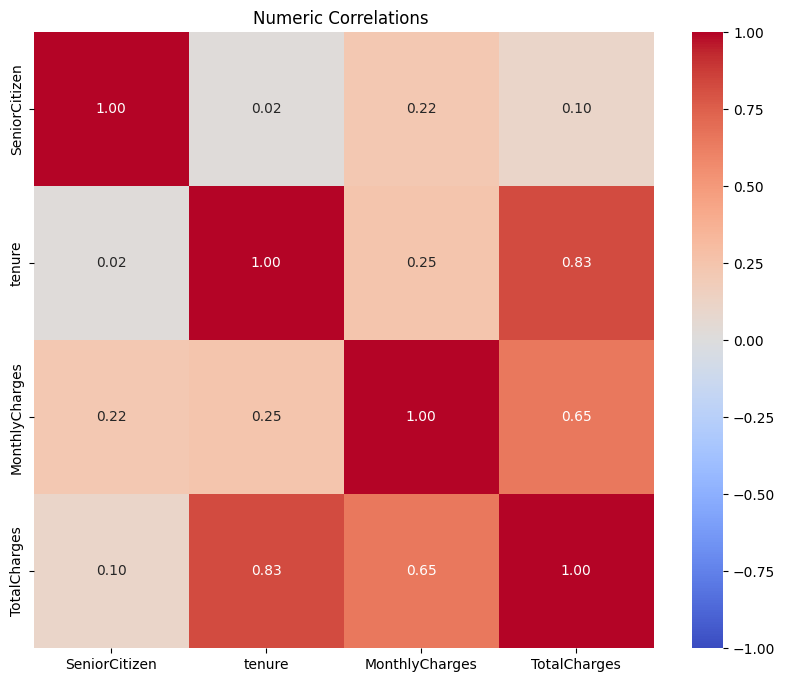

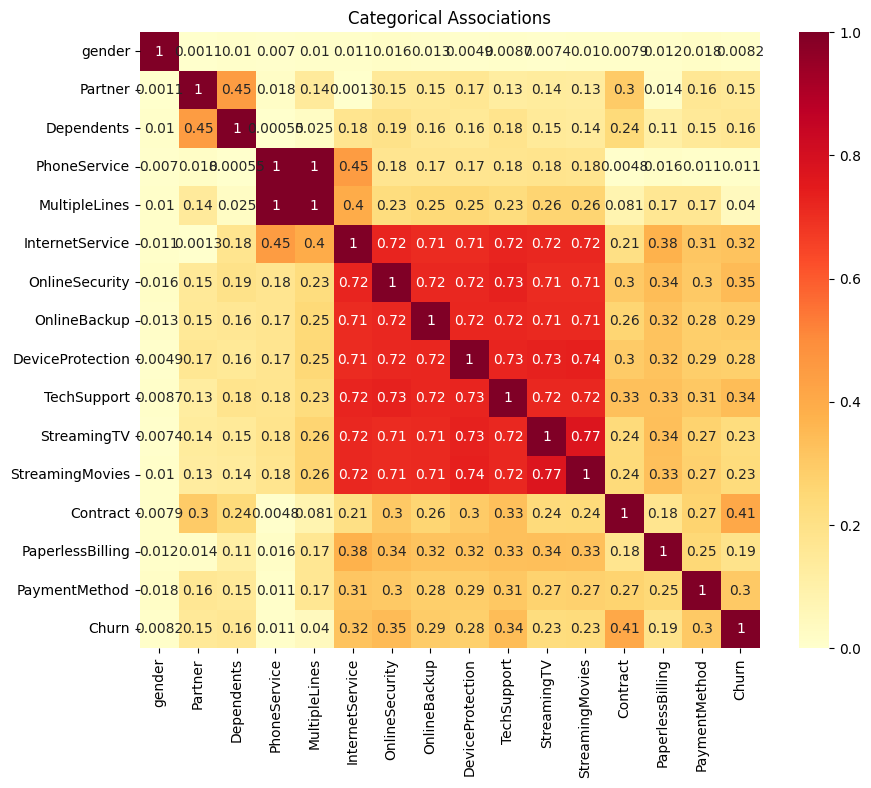

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Separate columns by type
numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 1. Numeric correlations
if numeric_cols:
    numeric_corr = df[numeric_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', vmin=-1, vmax=1)
    plt.title('Numeric Correlations ')
    plt.show()

# 2. Categorical associations 
if len(categorical_cols) > 1:
    def cramers_v(x, y):
        contingency = pd.crosstab(x, y)
        chi2 = chi2_contingency(contingency)[0]
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0
    
    cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    
    cramers_matrix = cramers_matrix.astype(float)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cramers_matrix, annot=True, cmap='YlOrRd', vmin=0, vmax=1)
    plt.title("Categorical Associations")
    plt.show()

## Analytical Notes
- No real difference between gender noticed
- Customers with higher monthly charges are more likely to churn
- new customers are more likely to churn
- Most who Churn have a monthly contract.
- Most who churn are are paying through Electronic check
- Customers with Fiber Optics Internet tend to churn noticably more often than others
- Customers with dependents are less likely to churn
- Customers without partner are more likely to churn
- Senior citizens proportionally to non-seniors are more likely to churn. (important to note: number of seniors is significantly lower than non-seniors)
- Customers without online security are significantly more likely to churn than ones with.
- Customers with paperless billing are more likely to churn
- Customers without technical support are more likely to churn
- There are extremely few customers (10%) without phone service. And out of that, 25% of the customers tend to Churn.
- 

## Reset and processing

In [836]:
import regex
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()
df['TotalCharges'] = df['TotalCharges'].astype(float)
df = df.drop("customerID", axis=1)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [837]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [838]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [839]:
df["hasMultipleLines"] = (df["MultipleLines"] == "Yes").astype(int)
df["hasOnlineSecurity"] = (df["OnlineSecurity"] == "Yes").astype(int)
df["hasDeviceProtection"] = (df["DeviceProtection"] == "Yes").astype(int)
df["hasTechSupport"] = (df["TechSupport"] == "Yes").astype(int)
df["hasStreamingTV"] = (df["StreamingTV"] == "Yes").astype(int)
df["hasStreamingMovie"] = (df["StreamingMovies"] == "Yes").astype(int)
df["Contract"] = df["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
df["PaperlessBilling"] = (df["PaperlessBilling"] == "Yes").astype(int)
df["Partner"] = (df["Partner"] == "Yes").astype(int)
df["Dependents"] = (df["Dependents"] == "Yes").astype(int)
df["PhoneService"] = (df["PhoneService"] == "Yes").astype(int)
df["wasElectricalCheckPayment"] = (df["PaymentMethod"] == "Electronic check").astype(int)
df["wasFiberrOpticInternet"] = (df["InternetService"] == "Fiber optic").astype(int)
df["charge_ratio"] = df["TotalCharges"] / (df["MonthlyCharges"] + 1)
df["AvgAmtPaidOverall"] = df["TotalCharges"]/df["tenure"]

df["hasExtraInternetServices"] = (df["hasStreamingTV"] + df["hasStreamingMovie"] + df["hasDeviceProtection"] )
df["short_tenure"] = (df["tenure"] < 12).astype(int)
df["month_to_month"] = (df["Contract"] == "Month-to-month").astype(int)
df["fiber_no_security"] = (
    (df["hasExtraInternetServices"] == 1) &
    (df["hasOnlineSecurity"] == 0)
).astype(int)
df["no_support_services"] = (
    (df["hasTechSupport"] == 0) &
    (df["hasOnlineSecurity"] == 0)
).astype(int)
df["high_monthly"] = (df["MonthlyCharges"] > df["MonthlyCharges"].median()).astype(int)

df["senior_month_to_month"] = (
    (df["SeniorCitizen"] == 1) &
    (df["Contract"] == "Month-to-month")
).astype(int)

df["high_charge_no_contract"] = (
    (df["MonthlyCharges"] > df["MonthlyCharges"].quantile(0.75)) &
    (df["Contract"] == "Month-to-month")
).astype(int)

In [840]:
risk_cols = [
    "SeniorCitizen",
    "high_monthly",
    "short_tenure",
    "month_to_month",
    "fiber_no_security",
    "no_support_services",
    "PaperlessBilling",
    "wasElectricalCheckPayment",
    "hasExtraInternetServices"
]

df["risk_score"] = df[risk_cols].sum(axis=1)

safe_cols = ["SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "hasMultipleLines", "MonthlyCharges", "TotalCharges", "hasOnlineSecurity", "hasStreamingTV", "hasStreamingMovie", "hasDeviceProtection",
            "hasTechSupport", "Contract", "PaperlessBilling", "wasElectricalCheckPayment", "short_tenure", "fiber_no_security", "no_support_services", "risk_score", "senior_month_to_month", "high_charge_no_contract"]





X = df[safe_cols]
y = df['Churn']

<Axes: >

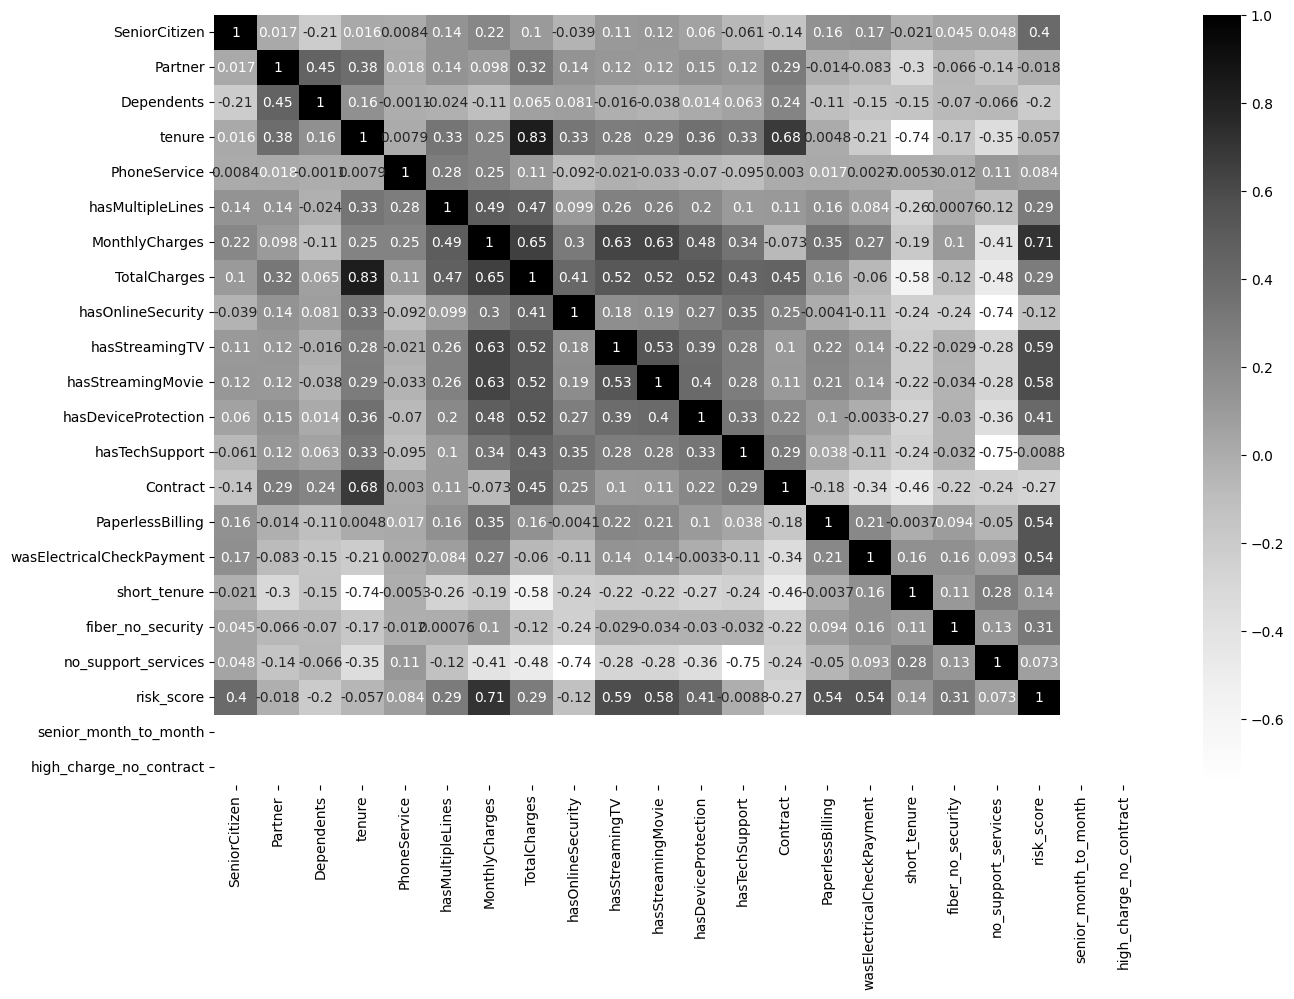

In [841]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, cmap="Greys")

In [842]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [843]:
from sklearn.preprocessing import StandardScaler

num_cols = ['MonthlyCharges']

In [844]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [845]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)
report = classification_report(y_test, y_pred)
print(report)

KNN accuracy: 0.7691943127962085
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1549
           1       0.61      0.37      0.46       561

    accuracy                           0.77      2110
   macro avg       0.70      0.64      0.66      2110
weighted avg       0.75      0.77      0.75      2110



In [846]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))
report = classification_report(y_test, y_pred)
print(report)

0.7933649289099526
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1549
           1       0.61      0.37      0.46       561

    accuracy                           0.77      2110
   macro avg       0.70      0.64      0.66      2110
weighted avg       0.75      0.77      0.75      2110



In [847]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)

SVM Accuracy: 0.7564
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1549
           1       0.90      0.09      0.17       561

    accuracy                           0.76      2110
   macro avg       0.83      0.55      0.51      2110
weighted avg       0.79      0.76      0.67      2110



In [848]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10, class_weight= {0: 1, 1: 2}, penalty= 'l2', solver='liblinear')
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

print(f"Logistic Regression: {lr.score(X_test, y_test)}")
report = classification_report(y_test, y_pred)
print(report)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42, learning_rate= 0.05, max_depth=5, min_samples_split=10, n_estimators= 100, subsample= 0.8)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(f"Gradient Boosting: {gb.score(X_test, y_test)}")
report = classification_report(y_test, y_pred)
print(report)



xgb = XGBClassifier(random_state=42)

xgb.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred = xgb.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

Logistic Regression: 0.7696682464454976
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1549
           1       0.55      0.73      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110

Gradient Boosting: 0.8028436018957346
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.51      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.59      0.50      0.54       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2

## Hyperparameter Tuning

In [849]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score


# Smaller, focused grid (faster)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,  # Fewer folds = faster
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {grid_search.best_estimator_.score(X_test, y_test):.4f}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 1.0}
Best CV Score: 0.8009
Test Accuracy: 0.7938


## Final Model

In [850]:

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42, learning_rate= 0.05, max_depth=3, min_samples_split=5, n_estimators= 100, subsample= 1.0)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(f"Gradient Boosting: {gb.score(X_test, y_test)}")
report = classification_report(y_test, y_pred)
print(report)



Gradient Boosting: 0.7938388625592417
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [851]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

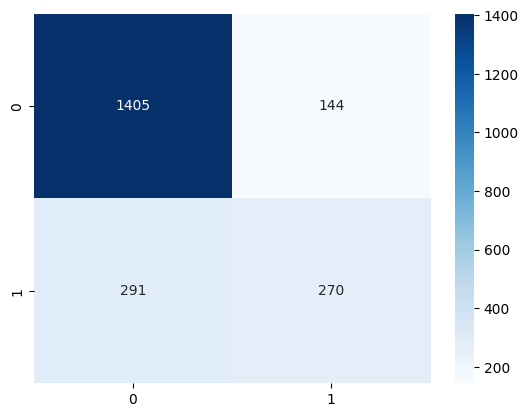

In [852]:
sns.heatmap(data=cm, annot=True,  fmt='.0f', cmap='Blues')